## Stochastic Processes Project
### Name: Rodolfo Croes
### Version: 1
### 


In [1]:
#some libraries that are needed.
import numpy as np
import random as random
from matplotlib import pyplot as plt
import networkx as nx
import pygraphviz as pgv
import math
import scipy.stats as st

## Task 1
State the Student ID, add a random digit at the end and get 4 probabilities by splitting the student id into 4 two digit numbers

For every run of this program, the digit at the end of p4 will change. This will be taken into account in the explanation for Task 3.

In [2]:
# split 7 digit student id and 1 random digit at the end into 4 probabilities and print them
# state my student id
studentid = "0123456"
# generate a random digit
randomdigit= random.randrange(0,9)
# append this random digit to the student number
studentid = studentid + str(randomdigit)
# split the student id string, cast it a a float and divide it by 100
p1=float(studentid[:2]) / 100
p2=float(studentid[2:4]) / 100
p3=float(studentid[4:6]) / 100
p4=float(studentid[6:8]) / 100
print(f"student id: {studentid[:-1]}\nrandomdigit: {randomdigit}\np1: {p1}\np2: {p2}\np3: {p3}\np4: {p4}")

student id: 0123456
randomdigit: 0
p1: 0.01
p2: 0.23
p3: 0.45
p4: 0.6


## Task 2
### Part a
Given a transition matrix of a stochastic process, calculate the missing value x and draw the state space diagram of this

Because this is a stochastic process, this means that all of the entries in one row should add up to 1 for all the rows in the matrix. Thus to find x, we need to do 1 minus the sum of all the other entries in x's row.
To draw the state space diagram, we are using the networkx and pygraphviz to create the nodes needed and the edges that have a value > 0. The edge weights in the state space diagram that are equal to 0 have been commented out for cleanliness.

x = 0.16

The state diagram for 
[[0.18 0.1  0.23 0.02 0.47]
 [0.   1.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.  ]
 [0.31 0.19 0.21 0.16 0.13]
 [0.22 0.32 0.08 0.28 0.1 ]]
is: 



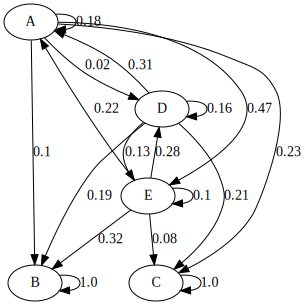

In [3]:
# calculate x by summing the values in the row that x is in 
# and get the difference between the sum and 1
sumofrowx = 0.31 + 0.19 + 0.21 + 0.13
x = round(1 - sumofrowx, 2)
print(f"x = {x}\n")
# define the transition matrix P
P = np.array([[0.18, 0.1, 0.23, 0.02, 0.47],[0,1,0,0,0],[0,0,1,0,0],[0.31,0.19,0.21,x,0.13],[0.22,0.32,0.08,0.28,0.10]])
print(f"The state diagram for \n{P}\nis: \n")
# make the state space diagram by defining nodes and edges with their weights
# commented out the edges with a weight of 0
G = nx.MultiDiGraph(directed = True)
G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_node('E')
G.add_edge('A', 'A', weight=P[0,0])
G.add_edge('A', 'B', weight=P[0,1])
G.add_edge('A', 'C', weight=P[0,2])
G.add_edge('A', 'D', weight=P[0,3])
G.add_edge('A', 'E', weight=P[0,4])
#G.add_edge('B', 'A', weight=P[1,0])
G.add_edge('B', 'B', weight=P[1,1])
#G.add_edge('B', 'C', weight=P[1,2])
#G.add_edge('B', 'D', weight=P[1,3])
#G.add_edge('B', 'E', weight=P[1,4])
#G.add_edge('C', 'A', weight=P[2,0])
#G.add_edge('C', 'B', weight=P[2,1])
G.add_edge('C', 'C', weight=P[2,2])
#G.add_edge('C', 'D', weight=P[2,3])
#G.add_edge('C', 'E', weight=P[2,4])
G.add_edge('D', 'A', weight=P[3,0])
G.add_edge('D', 'B', weight=P[3,1])
G.add_edge('D', 'C', weight=P[3,2])
G.add_edge('D', 'D', weight=P[3,3])
G.add_edge('D', 'E', weight=P[3,4])
G.add_edge('E', 'A', weight=P[4,0])
G.add_edge('E', 'B', weight=P[4,1])
G.add_edge('E', 'C', weight=P[4,2])
G.add_edge('E', 'D', weight=P[4,3])
G.add_edge('E', 'E', weight=P[4,4])
#display the state transition diagram
for u,v,d in G.edges(data=True):
    d['label'] = d.get('weight', '')
    
Pdiagram = nx.nx_agraph.to_agraph(G)
Pdiagram.layout(prog='dot')
Pdiagram

### Part b
Assuming the initial distribution of states are: A = 13%, B = 24%, C = 32%, D = 28%, E = 3%, Calculate the distribution after 3 generations

Given the starting state, we can get the distribution after 3 generations by taking the initial distribution and multiplying it to the left by the transition matrix to the power of 3. So pi(3) = pi(0) * P^3. P^3 is derived from the Chapman-Kolmogorov equation.

In [4]:
# define initial distribution in terms of probabilities
pi0 = np.array([0.13, 0.24, 0.32, 0.28, 0.03])
# calculate the transition matrix to the power of 3
P3 = np.linalg.matrix_power(P, 3)
# calculate the 3 generation distribution
pi3 = np.dot(pi0, P3)
print(f"Transition matrix after 3 generations: \n{P3}\nDistribution of states after 3 generations: \n{pi3}")

Transition matrix after 3 generations: 
[[0.097988 0.35564  0.38566  0.06256  0.098152]
 [0.       1.       0.       0.       0.      ]
 [0.       0.       1.       0.       0.      ]
 [0.084752 0.376798 0.384802 0.063852 0.089796]
 [0.0836   0.504644 0.259728 0.057264 0.094764]]
Distribution of states after 3 generations: 
[0.038977   0.40687596 0.4856722  0.02772928 0.04074556]


### Part C
Rewrite P in canonical form, clearly Identifying R and Q

The canonical form is a matrix where all of the absorbing states are sent to the first row(s) of the matrix and then ordered to appear as the identity matrix (I). The elements in the columns of the canonical form must match the column elements of the matrix P.

The matrix R contains the elements that describe when a transient state goes to an absorbing state. The matrix Q contains the elements that describe when a transient state goes to other transient states.

In [5]:
# rewrite matrix as canonical form

# this function takes in a nxn transition matrix
# returns the matrix but with the rows containing 1's sent to the top rows
# and the other rows shifted down
def onestotop(matr):
    # find n of nxn matrix
    size = len(matr)
    # creates empty matrix to append rows that contain 1's in it
    rowswithones = np.zeros((0,size))
    # creates an empty nxn matrix to return
    canonical = np.zeros((0,size))
    # get the rows that contain 1 from the matrix
    for i in matr:
        if 1 in i:
            rowswithones = np.vstack([rowswithones, i])
    # check if matrix has values, if not return with error
    if (rowswithones.size == 0):
        print("The matrix provided has no rows with element of 1")
        return np.zeros(0)
    # using the matrix filled with rows of ones, we append them first to the nxn matrix
    for i in matr:
        for j in rowswithones:
            if (j == i).all():
                canonical = np.vstack([canonical, j])
                j = np.delete(j, (0), axis=0)
    # using the existing matrix with ones on top, append the other rows back to the matrix in order
    for i in matr:
        if 1 not in i:
            canonical = np.vstack([canonical, i])
    # return the matrix with rows containing 1's above
    return canonical

# this function takes in a nxn transition matrix with 1's on the first row(s)
# returns for every row that contains a 1 the identity matrix equivalent of
# said row
def ordertoidentity(matr):
    # find n of nxn matrix
    size = len(matr)
    # create identity matrix of size nxn
    imatr = np.identity(size)
    # count the amount of rows that contain 1's
    icount = 0
    for i in matr:
        if 1 in i:
            icount += 1
    # for every row that contains a 1, replace it with the identity matrix
    # equivalent row
    for i in range(icount):
        matr[i] = imatr[i]
    # return modified matrix
    return matr
            
        
# this function takes in a transition matrix
# returns the canonical form of the matrix
def canonicalform(matr):
    # check if matrix is square, return error if it isn't
    if (len(matr.shape) != 2 or matr.shape[0] != matr.shape[1]):
        print("This matrix is not square")
        return np.zeros(0)
    # check if matrix is stochastic
    # get a list of sum of rows
    sumofrows = np.sum(matr, axis=1).tolist()
    for i in sumofrows:
        #if one row's sum is not equal to 1, send back error
        if i != 1:
            print("This matrix is not stochastic")
            return np.zeros(0)
    # send the rows with 1's to the top
    Prows = onestotop(matr)
    # if this is unsucesfull, return with empty matrix
    if (Prows.size == 0):
        return matr
    # transpose the matrix to do the same for the columns
    Ptrans = np.transpose(Prows)
    # send the rows with 1's to the top of the transposed matrix
    Pcols = onestotop(Ptrans)
    # transpose the reordered transposed matrix to return it to the original form
    Pcanonical = np.transpose(Pcols)
    # reoder the rows that contain 1's to the identity matrix order
    Pidentity = ordertoidentity(Pcanonical)
    return Pidentity

# this function takes in a canonical form transition matrix
# returns the R and Q matrices of the given matrix
def randqmatrix(matr):
    # find n of nxn matrix
    size = len(matr)
    # initialize the identity matrix and compare it to the matrix passed in
    # if they are identical then there is no R or Q and return 0's if this is true
    imatr = np.identity(size)
    if (imatr == matr).all():
        print("There is no R and Q because Identity matrix was passed in")
        return 0, 0
    # count the amount of rows with 1's in the passed in matrix
    count = 0
    for i in matr:
        if 1 in i:
            count += 1
    # calculate the difference between the amount of rows with 1's and total rows
    difference = size - count
    # find matrix R by using the dimension difference x count, then map it to the bottom left
    # of the matrix & extract a matrix of this dimension
    pr = matr[-difference:, :count]
    # find matrix Q by using the dimension difference x difference, then map it to the bottom right
    # of the matrix & extract a matrix of this dimension
    pq = matr[-difference:,-difference:]
    # return the matrices Q and R
    return pq, pr

# call the function to get the canonical form of P
pCanon = canonicalform(P)
# check if there is a canonical form of P
if(pCanon.size != 0):
    # print out the canonical form of P
    print(f"The canonical form of: \n{P}\n is: \n{pCanon}\n")
    # call the function to get the matrices R and Q from the canonical form matrix
    qMatrix, rMatrix = randqmatrix(pCanon)
    # check if the matrices has values in them before printing them out
    if((qMatrix != 0).any() or (rMatrix != 0).any()):
        # print out R and Q
        print(f"The matrix R is: \n{rMatrix}\n\n The matrix Q is: \n{qMatrix}\n")

The canonical form of: 
[[0.18 0.1  0.23 0.02 0.47]
 [0.   1.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.  ]
 [0.31 0.19 0.21 0.16 0.13]
 [0.22 0.32 0.08 0.28 0.1 ]]
 is: 
[[1.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.  ]
 [0.1  0.23 0.18 0.02 0.47]
 [0.19 0.21 0.31 0.16 0.13]
 [0.32 0.08 0.22 0.28 0.1 ]]

The matrix R is: 
[[0.1  0.23]
 [0.19 0.21]
 [0.32 0.08]]

 The matrix Q is: 
[[0.18 0.02 0.47]
 [0.31 0.16 0.13]
 [0.22 0.28 0.1 ]]



### Part D
For each state i, calculate the mean number of times that the process is in a transient state j, given it started in i

This can be found by calculating the matrix N (fundamental matrix) where it is a matrix the same size as matrix Q from before, where each element in position (i,j) is the mean number of time that the process is in a transient state j given it started in i. The matrix N = inverse(I-Q).

In [6]:
# function that takes in the Q matrix
# returns the fundamental matrix N
def nmatrix(qmatr):
    # find n of nxn matrix
    size = len(qmatr)
    # generate the identity matrix of nxn
    imatr = np.identity(size)
    # subtract the identity matrix by the Q matrix
    nmatr = np.subtract(imatr, qmatr)
    # inverse the matrix
    nmatr = np.linalg.inv(nmatr)
    return nmatr

nMatrix = nmatrix(qMatrix)
print(f"The matrix N is: \n{nMatrix}\n")

The matrix N is: 
[[1.57714326 0.32787748 0.87097934]
 [0.67416518 1.39084924 0.55296449]
 [0.59526419 0.51285648 1.49605057]]



### Part E
For each state i, find the mean number of transitions before the process hits an absorbing state, given that the process started in a transient state i.

The vector M of length of number of rows/columns in N denotes how far the i(th) element is from an absorption state. This can be calculated by taking the matrix N and multiplying it by a column vector containing 1's. So M = N * (vector).

In [7]:
# this function takes in the fundamental matrix N
# returns the vector M
def mvector(nmatr):
    # find n of nxn matrix
    size = len(nmatr)
    # make a vector of 1xn of 0's
    lvect = np.zeros((size, 1))
    # replace the 0's with 1's
    lvect[lvect == 0] = 1
    # matrix multiply N and the vector
    mvect = np.dot(nmatr, lvect)
    return mvect

mVector = mvector(nMatrix)
print(f"The vector M is: \n{mVector}\n")

The vector M is: 
[[2.77600007]
 [2.61797891]
 [2.60417123]]



### Part F
For each state i, find the probabilty of ending in each of the absorbing states.

The probability that the state i will end in each of the absorbing state j is given by the matrix B whose elements are given by multiplying the fundamental matrix N and the matrix R which are the transition probabilities to go from the transient states to the absobing states.

In [8]:
# this function takes in the fundamental matrix N and the matrix of probabilities R
# returns the matrix of absorption probabilities B
def bmatrix(nmatr, rmatr):
    bmatr = np.dot(nmatr, rmatr)
    return bmatr
bMatrix = bmatrix(nMatrix, rMatrix)
print(f"The matrix B is: \n{bMatrix}\n")

The matrix B is: 
[[0.49872443 0.50127557]
 [0.50862651 0.49137349]
 [0.63570533 0.36429467]]



## Task 3
### Part A
Simulate a discrete random walk in 2D starting at the origin (0,0) and moving north with probability p1, south with p2, east with p3, west with p4.

Plot 5 walks with 2500 steps on the same plot.
To do this, we must first take the probabilities and normalize them to a range between 0 and 1. Then using these probabilities simulate a random walk of 2500 steps and plot it. Do this 5 times and we can see that all the walks go in the same direction (For this case being South West because the p2 > p1 and p4 > p3).



In [9]:
# define a function to do a random walk
# function that takes in the amount of steps taken and a list of probabilities for each step in a direction
# return a list of positions for the random walk
def random2Dwalk(steps, probabilities, startposition=(0,0)):
    # given start point tuple, assign it to x and y positions
    xposition = startposition[0]
    yposition = startposition[1]
    # make array to hold the position tuples per step
    history = []
    # put the initial position in the array
    history.append((xposition, yposition))
    # loop for every step of the walk
    for i in range(steps-1) :
        # define a random number between 0 and 1
        rnum = random.random()
        # compare the random number with the probability. 
        # if it is in a range of length p1 then take step north
        # and save the current position in the walk
        if rnum <= probabilities[0]:
            yposition = yposition + 1
            history.append((xposition, yposition)) 
        # if it is in a range of length p2 then take step south
        # and save the current position in the walk
        elif rnum > probabilities[0] and rnum <= (probabilities[0] + probabilities[1]):
            yposition = yposition - 1
            history.append((xposition, yposition))
        # if it is in a range of length p3 then take step east
        # and save the current position in the walk
        elif rnum > (probabilities[0] + probabilities[1]) and rnum <= (probabilities[0] + probabilities[1] + probabilities[2]):
            xposition = xposition + 1
            history.append((xposition, yposition))
        # if it is in a range of length p4 then take step west
        # and save the current position in the walk
        elif rnum > (1 - probabilities[-1]) and rnum <= 1:
            xposition = xposition - 1
            history.append((xposition, yposition))
    # return list of steps
    return history
# function that takes in probabilities and normalizes them
# returns a list of normalized probabilities
def normalizeprobabilities(probabilities):
    # make a list to save the normalized probabilities
    normalizedprob = []
    # get the sum of the list of probabilities given
    sumofprob = sum(probabilities)
    # for each probability, divide it by the sum of all prob and add it to normalized list
    for i in probabilities:
        normalizedprob.append(i/sumofprob)
    # return normalized list
    return normalizedprob



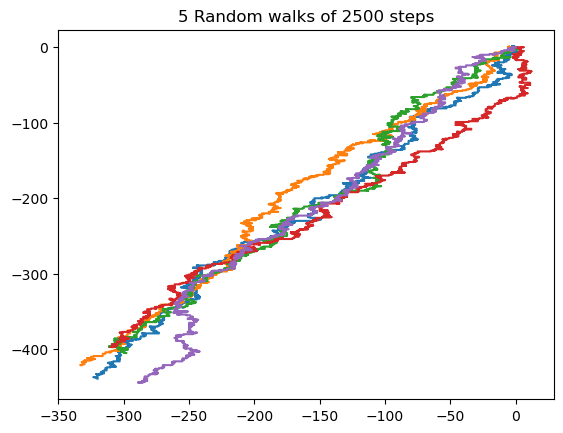

In [10]:
# define list of probabilities from 1
probabilities = [p1, p2, p3, p4]
# normalize the list of probabilities
probabilities = normalizeprobabilities(probabilities)
# make a list to hold each random walk
listofwalks = []
# define number of walks
num_walks = 5
# define amount of steps per walk
steps = 2500
# simulate num_walk walks
for i in range(num_walks):
    onewalk = random2Dwalk(steps, probabilities)
    # make lists to plot
    x = []
    y = []
    for i in onewalk:
        x.append(i[0])
        y.append(i[1])
    # plot each walk
    plt.plot(x,y)
plt.title("5 Random walks of 2500 steps")
plt.show()

### Part B
Calculate the expected length of the walk after 2500 steps on the same plot (distance travelled from starting point)

We will run many simulations of the walk and look at the distribution of the distances gathered. From this, we can deduce an expected value (an average) of the distance depending on the shape of the histogram. Because this algorithm does not take a lot of computing power and time, we use 10000 walks to gather many lengths to plot on the histogram.

In [11]:
# Create a function to simulate a random 2d walk
# Takes in the amount of steps, the probabilities and the starting point
# Returns the distance from the starting point of said walk
def random2Dwalk2(steps, probabilities, startposition=(0,0)):
    # given start point tuple, assign it to x and y positions
    xposition = startposition[0]
    yposition = startposition[1]
    # loop for every step of the walk
    for i in range(steps-1) :
        # define a random number between 0 and 1
        rnum = random.random()
        # compare the random number with the probability. 
        # if it is in a range of length p1 then take step north
        if rnum <= probabilities[0]:
            yposition = yposition + 1
        # if it is in a range of length p2 then take step south
        elif rnum > probabilities[0] and rnum <= (probabilities[0] + probabilities[1]):
            yposition = yposition - 1
        # if it is in a range of length p3 then take step east
        elif rnum > (probabilities[0] + probabilities[1]) and rnum <= (probabilities[0] + probabilities[1] + probabilities[2]):
            xposition = xposition + 1
        # if it is in a range of length p4 then take step west
        elif rnum > (1 - probabilities[-1]) and rnum <= 1:
            xposition = xposition - 1
    # after the random walks is done, we take the x position and y position
    # and find the difference of each from the starting point
    # then sum these two values together and get the distance traveled from 
    # the start position
    xdistance = abs(xposition) - abs(startposition[0])
    ydistance = abs(yposition) - abs(startposition[1])
    totaldistance = xdistance + ydistance
    # return total distance from start point
    return totaldistance

Average of distances: 716.5318
Standard deviation of endpoints: 48.22088747379085
95% confidence interval: 620.0900250524182 / 812.9735749475817 


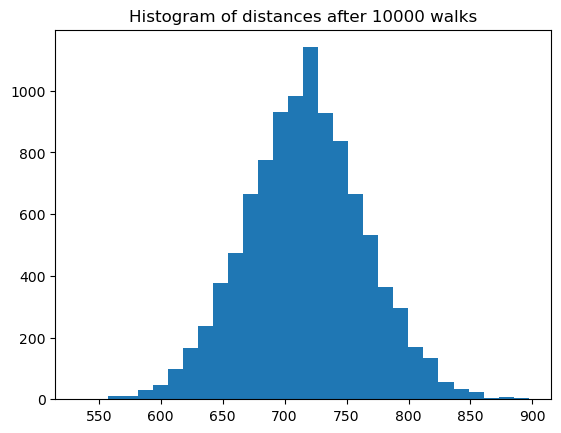

In [12]:
# test the lowest and highest possible p4
# p4 = 0.50
# p4 = 0.59
# define list of probabilities from 1
probabilities = [p1, p2, p3, p4]
# normalize the list of probabilities
probabilities = normalizeprobabilities(probabilities)
# define amount of steps per walk
steps = 2500
# define number of walks
num_walks = 10000
# make a list to hold each walk's distance
distances = []
# simulate num_walks amount of walks and save it to a list
for i in range(num_walks):
    distances.append(random2Dwalk2(steps, probabilities))
# show the average distance in the list
average = sum(distances)/len(distances)
print(f"Average of distances: {average}")
# show the standard deviation
standdev = np.std(distances)
print(f"Standard deviation of endpoints: {standdev}")
# show the variance
std2 = standdev * 2
print(f"95% confidence interval: {average - std2} / {std2 + average} ")

plt.hist(distances, bins=30)
plt.title("Histogram of distances after 10000 walks")
plt.show()

From the shape of the histogram and the average distances gotten from the list, we can see that it follows a normal distribution with the expected length of the walk being between 620 and 812 steps from the starting point with a standard deviation of about 48 depending on p4. This also applies for the 95% confidence interval of the normal distribution. The reason for the length range instead of an exact length value is to account for when the last digit of p4 changes based on the randomization at the start of the program.

The way the range of expected length and the 95% confidence interval was found is by running this simulation against the lowest possible value for p4 (0,60) and the highest possible value (0.69).This range was acquired by running 10000 walks. The standard deviation did not change drastically per run meaning that the majority of the results lie between. If we wanted an exact number for the estimated length we would use the current p4 and run the same amount of walks on it and if after running many simulations the number before the decimal place is consistent, then we can state that the expected length of the walk is equal to that number. 

To answer for this simulation, we have a p4 of 0.60. For these probabilities, we see that the expected length of the walk is 716 steps.

## Task 4
### Part a
Simulate the random walk in 1 dimension for x against t given the function dS = a(x,t)dt + b(x,t)dW where dW = e sqrt(dt) is a Weiner process with e being a random number pulled from a normal distribution of mean 0 and standard deviation 1 and a(x,t) and b(x,t) are chosen functions.

Before we start simulating, from page 61 of the notes given we can see that this function is an Ito process. The information needed to start the simulation is the state that we start in, the time that we start and end the walk, and the amount of steps taken between the start and end of the time given. For simplicity, we will choose the time span to be from 0-1 units of time, the simulation starts at state 0, and that the amount of steps is 2500 to visualize one simulation needed for part b of this task.

Then we find the change in time per step (dt) by taking the difference between the start and the end of time and divide that by the amount of steps taken in said time. Knowing these values we can simulate a random walk with chosen functions a = 4x - (t/2) and b = x + 2t. We also define a Weiner process of mean 0 and variance of dt. This is derived from when a random number that follows gaussian distribution is multiplied by a consant that the output is a random number drawn from a normal distribution with mean 0 and variance of that constant squared (N~0,constant^2). So for this example where dW = e * sqrt(dt), the variance would be (sqrt(dt))^2 = dt. 

From this we can get the change in state dS and sum it with the previous state S[x-1] to get the next state S[x]. We continue doing this for every step until we reach the end of the time given. From the saved state and time changes we plot the random walk between time 0 and 1

In [13]:
# make two functions with respect to x,t
# this function takes in numbers x and a t
# returns cos(x) + t/2
def functionA(x,t):
    return float((4 * x) - (t/2))
# this function takes in numbers x and a t
# returns (t + x)
def functionB(x,t):
    return float((2 * t) + x)
# this function simulates a random walk between points t0 and endt
# takes in the starting state, the start time, the end time and the amount of
# steps between the start and end time
# returns a list of each timepoint and a list of each step taken on said timepoints
def contrandomWalk(s0, t0, endt, steps):
    # start by calculating the size of the steps between start and end of given time
    dt = (endt-t0)/steps
    dtlist = [dt]
    # make two arrays to keep track of the step we take and at what point in time it is taken
    t = [t0]
    S = [s0]
    dSlist = [s0]
    # for each step we apply two functions to the given values
    for i in range(steps):
        a = functionA(S[-1], t[-1])
        b = functionB(S[-1], t[-1])
        # then we generate a random number with mean 0 and variance of 1
        r = random.gauss(0, 1.0)
        # find the Weiner process value by using the given function
        # This dW has the normal distribution with mean 0 and variance of dt
        dW = r * math.sqrt(dt)
        # We find the change in state by adding up function a times the change in time
        # and function b multiplied by the Weiner process value
        dS = (a*dt) + (b*dW)
        dSlist.append(dS)
        # This change in state, we sum it with the previous state and add it to the list of states
        S.append(S[-1] + dS)
        # We then add the time of the state change taking place to the list to keep them in sync
        dtlist.append(dt)
        t.append(t[-1] + dt)
    # we return the list of time and list of states 
    return S, t, dtlist, dSlist 


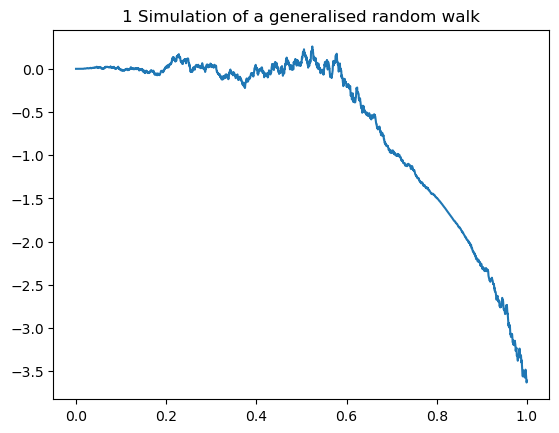

In [14]:
# define the starting state, the start time and the end time
s0, t0, endT= (0,0, 1)
# define the amount of steps taken
steps = 2500
# simulate a 1d random walk of step 2500
s, t, dt, ds = contrandomWalk(s0, t0, endT, steps)
# plot the walk
plt.plot(t,s)
plt.title("1 Simulation of a generalised random walk")
plt.show()

### Part b
Estimate the expected value for the walk after 2500 steps

For this Ito process, we use the same method of evaluating the expected value after 2500 steps except we measure the state at the end of the time instead of the length of a walk. The amount of walks chosen for this estimation is less than the one chosen in question 3 because this simulation takes more calculations per walk thus making this algorithm more costly to run many times. It also takes more time to collect all of these end states. We collect these states after 5000 walks and plot a histogram to see it's distribution.

Average of endpoints: -1.6032964512304273
Standard deviation of endpoints: 9.058087260383562
95% confidence interval: -19.719470971997552 / 16.512878069536697 


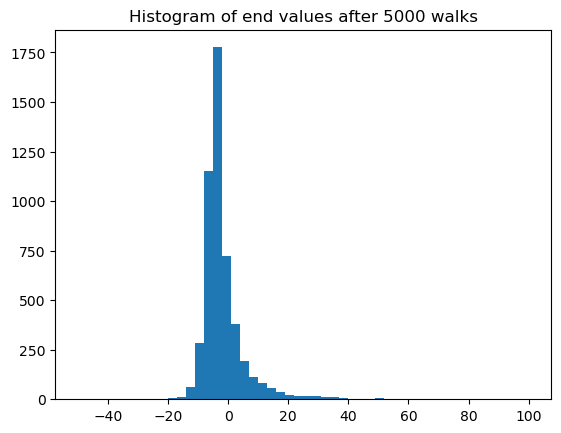

In [15]:
# define the starting state, the start time and the end time
s0, t0, endT= (0,0, 1)
# define the amount of steps taken
steps = 2500
# define the amount of walks done
walks = 5000
# define a list to keep the end points of these walks
endpoints = []
# simulate many 1d random walk of step 2500, and make a list of all the end points
for i in range(walks):
    s, t, dt, ds = contrandomWalk(s0, t0, endT, steps)
    endpoints.append(s[-1])

# print the average end points after the amount of walks
average = sum(endpoints) / len(endpoints)
print(f"Average of endpoints: {average}")
standdev = np.std(endpoints)
print(f"Standard deviation of endpoints: {standdev}")
std2 = standdev * 2
print(f"95% confidence interval: {average - std2} / {average + std2} ")
    
# plot the histogram of the end points
plt.hist(endpoints, 50, (-50,100))
plt.title("Histogram of end values after 5000 walks")
plt.show()



We can see from this plot that the collected values follows a normal distribution with a small standard deviation and 95% confidence interval. A possible reason for this is because this function converges to the same value because of the normally distributed random values chosen when calculating dW. From the average of endpoints for the simulation, we can see that the distribution slightly negatively skewed. This could be caused by function a because in an Ito process, the function a(x,t) dt controls the drift of the end state. So we can say that after 2500 steps, the estimated value of our function is roughly -1.

### Part c
If the walk starts at x=0, calculate the probability that x > 0 after 2500 steps.

To find P[x(tend) > 0 | x(t0) = 0], we can use the simulation above given that it is distributed normally and that all states at time 0 is 0 to find the probability. We standardize this distribution to a z-score by doing z = (x-mean) / std  where x is 0, and then from there look up the z-score on a z-table. Because this problem is P(x(tend) > 0) we know that to find the probability for this is equal to 1 - z-score. This is printed below.


In [16]:
# get z score for x = 0 from normal distribution in part b
zscore = (0 - average) / standdev
print(f"The z-score for the distribution in part B is: {zscore}")
# calculate the probability that x > 0 at the end. P(x>0) = p-value
probability = 1 - st.norm.cdf(zscore)
print(f"The probability that the end state is greater than 0 is: {probability}")

The z-score for the distribution in part B is: 0.17700165665687528
The probability that the end state is greater than 0 is: 0.4297535441508874


## Task 5
### Part A
Estimate Pi using a Markov Chain Monte Carlo method after 5 chains (random walks) using the area of a square and an area of a circle. State the burn-in for each chain. 

We start by using a circle with a radius of 1.0. Given this, we can get the diameter of the circle by multiplying the radius by 2. So we get the diameter of the circle being 2. This is also the length of one side of a square drawn to fit the entire circle in this square area. So we now that the area of a square encapsulating the circle is 2.0 by 2.0 (square has an area of 4 square units of length).

When we simulate a Monte Carlo to estimate a value, we would choose a number of trials and for each trial we would generate a random number. If that random number is in an area of our choosing and not in the total area of the simulation then this would count as a hit. So then to estimate a value we would take the number of hits after all the trials, and divide it by the number of trails simulated. This then gets multiplied by the total area of the simulation to give us an estimation of the value that we are trying to calculate. This method is called the rejection method of a Monte Carlo simulation.

For this case, we will be using the rejection method by generating random coordinates in a quarter of the area. Then calculate the number of hits by counting how many times the randomly generated coordinate lies in the area of the quarter circle.From algebra, we know that the way to graph a circle is using the function x^2 + y^2 = (radius)^2. So using this function we can tell when the coordinate that is randomly generated as (x,y) lies within a quarter of the circle. We then divide this sum by the number of total coordinates generated and multiply this by the total area of the square to scale this estimation from a quarter circle to an entire circle. The total number of coordinates generated is equal to the number of steps in a random walk.

In [17]:
# function takes in the amount of steps
# returns a list of the simulated estimate of pi per step
def estimatePiMCMC(steps):
    # define the radius of a circle with center at (0,0)
    radius = 1
    # calculate the diameter of the circle
    diameter = radius * 2
    # calculate the area that encapsulates the circle
    areaofsquare = diameter * 2
    # variable to count the number of hits in a Monte carlo simulation
    hits = 0
    # list of the estimate of pi per step in the simulation, starts at a 0 estimation
    estimateperstep = [0]
    # for every time step after 0, estimate pi and put that estimate in the list
    for i in range(1,steps):
        # generate coordinate in the circle
        x = random.random()
        y = random.random()
        # if the coordinates lie in the circle, count it as a hit
        if (x ** 2) + (y ** 2) <= (radius ** 2):
            hits += 1
        # add that estimate to the list of estimates
        estimateperstep.append(areaofsquare*(hits / i))
    # return the complete list of estimates after all the steps are completed
    return estimateperstep

The value of pi after 100000 steps for chain 1 is: 3.143511435114351
The value of pi after 100000 steps for chain 2 is: 3.134591345913459
The value of pi after 100000 steps for chain 3 is: 3.145671456714567
The value of pi after 100000 steps for chain 4 is: 3.136271362713627
The value of pi after 100000 steps for chain 5 is: 3.131311313113131


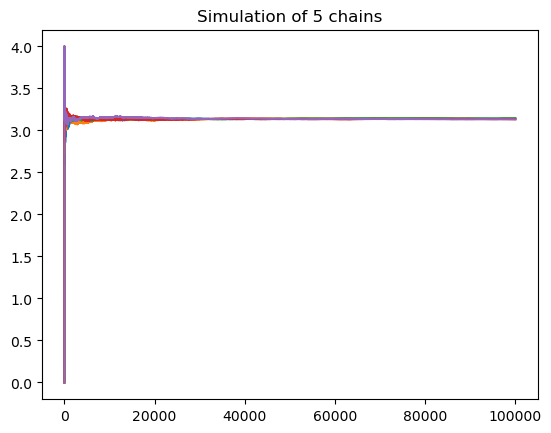

In [18]:
# define a list to put the chains in
listofchains = []
# define the amount of chains to run
numchains = 5
# define the amount of steps per random walk
steps = 100000
# define a count to track what chain is simulating
count = 1
# simulate the number of chains
for i in range(numchains):
    # run an estimation through steps
    listofestimates = estimatePiMCMC(steps)
    # add the estimation through steps to a list of chains
    listofchains.append(listofestimates)
    # print the value of pi after a large number of steps per chain
    print(f"The value of pi after {steps} steps for chain {count} is: {listofestimates[-1]}")
    # add 1 to the count for the next chain
    count += 1
# for every chain get a global estimate and plot each chain
for i in listofchains:
    # plot each chain
    plt.plot(i)
# divide the sum by the number of chains
plt.title("Simulation of 5 chains")
plt.show()

Collecting this estimation per step of the simulation and plotting it, we can visually see around what step the simulation starts consistently predicting pi.The amount of steps chosen after experimenting is 100000 steps because it did not take a lot of time to simulate and the shape of the plot below converges to one value. This happens when the error becomes smaller during the simulation.

From the first few samples of this estimation, there is a lot of variability thus making the estimation inconsistent. This is called the burn-in area of the Monte Carlo simulation.

The way to handle the burn in is to get rid of it to show that the chains are converging to one answer. Visually, we can see that after roughly 20000 steps, the chain is converging, so we can consider the burn in to be 20000. To show this is a correct burn in, we can get rid of the first 20000 estimations and plot the rest of the chains in a histogram and if the distribution has a normal shape around the value of pi then we have sucesfully identified the burn-in. Below is the histogram of the chains after handling the burn-in.

The burn in chosen by visual analysis for each chain is: 20000


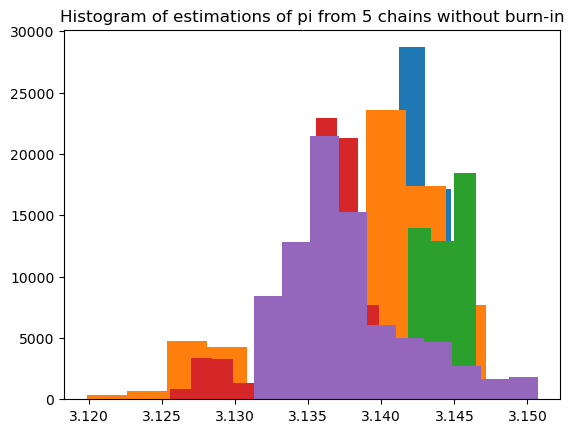

In [19]:
# define a new list of chains to account for burn-in
newlistofchains = []
# define the number of burn in values chosen to eliminate
burnin = 20000
print(f"The burn in chosen by visual analysis for each chain is: {burnin}")
# for every chain, we take away the burn-in variables and make a new list of 
# chains that account for burn in
for i in listofchains:
    # handle burn in of each chain
    fixedchains = i[burnin:]
    # append the new chain without burn in
    newlistofchains.append(fixedchains)
# plot each chain without burn in
for i in newlistofchains:
    plt.hist(i)
plt.title("Histogram of estimations of pi from 5 chains without burn-in")
plt.show()

### Part b
Calculate an estimate for pi and give an estimate of the error.

Seeing that the plot above describing the chains when burn in is handled somewhat resembles a normal distribution with most data skewed to the left, we can use the sum of means and the sum of standard deviations to estimate pi and the error of this estimation. Each chain describes a normal distribution so all of these can get a unique mean and standard deviation and summing these and dividing these sums by the number of chains gives us a global estimation of pi (mean) and a global error of estimation of pi (standard deviation). These results are printed below.

In [20]:
# after handling burn-in, calculate the global mean and mean standard deviation (error) of the simulations
# define mean and std dev variables that will be used per chain
mean = 0
stddev = 0
# for every chain after burn in is taken out, get the sum of means and standard deviations
for i in newlistofchains:
    mean += sum(i) / len(i)
    stddev += np.std(i)
# calculate the estimated pi from our 5 chains 
estimatepi = mean / numchains
# calculate the estimated error from our 5 chains 
estimatestddev = stddev / numchains
# print these results
print(f"The estimate pi generated from {numchains} chains of {steps} steps is: {estimatepi}")
print(f"The estimated error for this is: +/- {estimatestddev}")

The estimate pi generated from 5 chains of 100000 steps is: 3.13889094821475
The estimated error for this is: +/- 0.0038503507974381665
